# TSNE Analysis

In [1]:
import sys
sys.path.append('/home/hamid/ensemble_tool/EnsembleTools/')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


## Download from Atlas and Load Data

In [3]:
ens_codes = [
    'PED00156e001',
    'PED00157e001',
    'PED00158e001'
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.


In [4]:
analysis.generate_trajectories()

Trajectory already exists for ensemble PED00156e001. Loading trajectory.
Trajectory already exists for ensemble PED00157e001. Loading trajectory.
Trajectory already exists for ensemble PED00158e001. Loading trajectory.


In [6]:
# analysis.random_sample_trajectories(sample_size=200)

## Featurization

In [7]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52'

## Dimensionality Reduction

In [8]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50, 100], circular=True, range_n_clusters=range(2,10,1))

tsne is running...
Best Perplexity: 100
Best Number of Clusters: 3


## Analysis

In [9]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_plot_density(save=True)

This analysis is only valid for t-SNE reduction with phi_psi feature extraction.


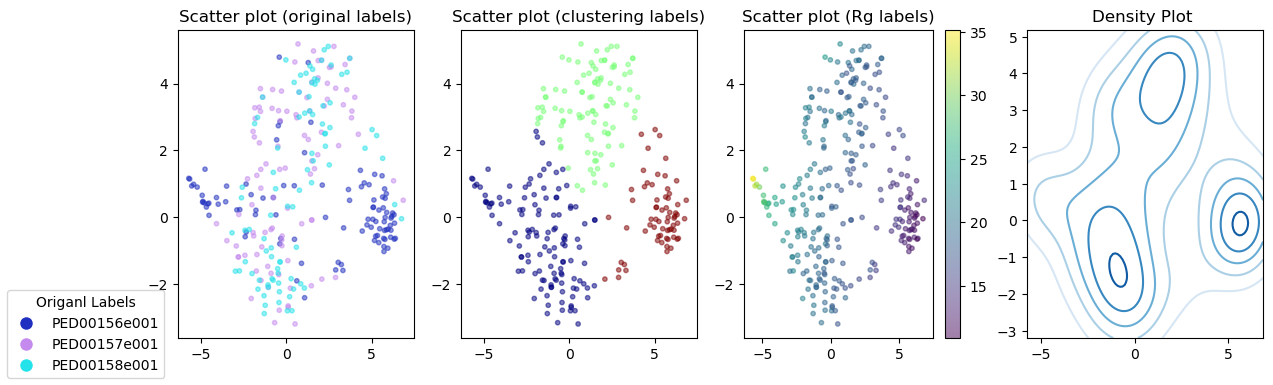

In [14]:
visualization.tsne_scatter_plot(save=False)

In [10]:
visualization.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\ped\plots\tsne.pdf


In [11]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\ped\plots\custom_report.pdf
